**Why Kalman Filter ?**

The Kalman filter is a powerful tool for forecasting time series data because it combines two key elements: a prediction model and a measurement model. The prediction model captures the underlying dynamics of the system being modeled, while the measurement model takes into account the noise and errors in the data.

One of the main advantages of the Kalman filter is that it can handle both linear and nonlinear systems. It can also handle multiple sources of uncertainty, such as process noise (random variations in the system's dynamics) and measurement noise (random errors in the data).

Another advantage of the Kalman filter is that it can update its estimate of the true value based on new measurements as they become available. This means that it can adapt to changing conditions and provide more accurate forecasts over time.

Overall, the Kalman filter is a powerful and flexible tool for forecasting time series data, and it is often used in a wide range of applications, including finance, engineering, and robotics.

**What is maths behid kalman filter**

The Kalman filter is a mathematical tool used to estimate the state of a system based on noisy measurements. It is based on Bayesian filtering, which involves using Bayes' theorem to update the probability of a hypothesis as new evidence becomes available.

At each time step, the Kalman filter makes a prediction about the state of the system based on the previous estimate and the dynamics of the system. It then compares this prediction to the actual measurement of the system, taking into account the measurement noise.

The Kalman filter then uses these two estimates to update its estimate of the true state of the system. Specifically, it combines the prediction and the measurement using a blending factor, which is determined by the relative uncertainties of the prediction and measurement. The resulting estimate is more accurate than either the prediction or the measurement alone, as it takes into account both the underlying dynamics of the system and the noise in the data.

**Why forecasting india 10Y yield is important?**

Forecasting India's 10-year yield can be important for a number of reasons. Here are a few examples:

Investment decisions: The 10-year yield is often used as a benchmark for long-term interest rates in India. Investors can use forecasted yield values to make informed decisions about whether to invest in long-term government bonds or other assets.

Monetary policy: The central bank of India, the Reserve Bank of India (RBI), uses interest rates, including the 10-year yield, as a tool to achieve its monetary policy objectives. Forecasting the 10-year yield can help the RBI anticipate changes in interest rates and adjust its monetary policy accordingly.

Economic analysis: The 10-year yield can be a useful indicator of economic conditions in India. For example, a rising yield may suggest that the economy is growing and investors are confident, while a falling yield may indicate that the economy is slowing and investors are less optimistic.

Risk management: Forecasting the 10-year yield can help financial institutions and other market participants manage risk. For example, banks can use forecasted yield values to hedge against potential changes in interest rates, while investors can use them to assess the risk of holding long-term bonds.

**To forecast India's 10-year yield using the Kalman filter, you can follow these steps:**

1.Load the yield data into a Pandas DataFrame or a NumPy array. You can 
obtain the data from FRED (Federal Reserve Economic Data) or any other source.

2.Create a KalmanFilter class with a constructor that takes in two parameters: process_variance and estimated_measurement_variance. These parameters represent the variances of the process noise and measurement noise, respectively.

3.Define two methods in the KalmanFilter class: input_latest_noisy_measurement and get_latest_estimated_measurement. The input_latest_noisy_measurement method takes in a noisy measurement and uses it to update the filter's estimate of the true value. The get_latest_estimated_measurement method returns the filter's current estimate of the true value.

4.Initialize an instance of the KalmanFilter class and pass in the process_variance and estimated_measurement_variance parameters.

5.Iterate over the yield data and pass each measurement to the input_latest_noisy_measurement method of the Kalman filter.

6.Use the get_latest_estimated_measurement method to retrieve the filter's estimate of the true value at each time step.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Use pandas to fetch GDP data from FRED
yield_data  = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=A191RL1Q225SBEA")




In [31]:
yield_data

,DATE,A191RL1Q225SBEA
0,1947-04-01,-1.1
1,1947-07-01,-0.8
2,1947-10-01,6.4
3,1948-01-01,6.2
4,1948-04-01,6.8
...,...,...
297,2021-07-01,2.7
298,2021-10-01,7.0
299,2022-01-01,-1.6
300,2022-04-01,-0.6


In [32]:
import numpy as np
import pandas as pd

# Load India's 10-year yield data from FRED

# Convert yield data to a NumPy array
yield_data = yield_data['A191RL1Q225SBEA'].values

class KalmanFilter:
    def __init__(self, process_variance, estimated_measurement_variance):
        self.process_variance = process_variance
        self.estimated_measurement_variance = estimated_measurement_variance
        self.posteri_estimate = 0.0
        self.posteri_error_estimate = 1.0

    def input_latest_noisy_measurement(self, measurement):
        priori_estimate = self.posteri_estimate
        priori_error_estimate = self.posteri_error_estimate + self.process_variance

        blending_factor = priori_error_estimate / (priori_error_estimate + self.estimated_measurement_variance)
        self.posteri_estimate = priori_estimate + blending_factor * (measurement - priori_estimate)
        self.posteri_error_estimate = (1 - blending_factor) * priori_error_estimate

    def get_latest_estimated_measurement(self):
        return self.posteri_estimate

# Initialize Kalman filter
kalman_filter = KalmanFilter(1, 1)

# Run Kalman filter on each measurement
forecasts = []
for measurement in yield_data:
    kalman_filter.input_latest_noisy_measurement(measurement)
    forecast = kalman_filter.get_latest_estimated_measurement()
    forecasts.append(forecast)



In [40]:
# # Forecast next period
latest_measurement = 1
kalman_filter.input_latest_noisy_measurement(latest_measurement)
forecast = kalman_filter.get_latest_estimated_measurement()

print("Forecast for next period: {}".format(forecast))


Forecast for next period: 1.391550687056272


In [33]:
def calculate_mse(forecasts, actuals):
    # Ensure that the forecasts and actuals have the same length
    assert len(forecasts) == len(actuals)
    # Calculate the squared errors
    squared_errors = [(forecasts[i] - actuals[i]) ** 2 for i in range(len(forecasts))]
    # Calculate the mean of the squared errors
    mean_squared_error = sum(squared_errors) / len(squared_errors)
    return mean_squared_error

In [34]:
mse = calculate_mse(forecasts, yield_data)
print("Mean squared error: {}".format(mse))

Mean squared error: 4.0908105246468836


In [35]:
# Create a dictionary with the actual and forecasted values
data = {'Actual': yield_data, 'Forecast': forecasts}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

In [36]:
df

,Actual,Forecast
0,-1.1,-0.733333
1,-0.8,-0.775000
2,6.4,3.666667
3,6.2,5.232727
4,6.8,6.201389
...,...,...
297,2.7,4.331624
298,7.0,5.980771
299,-1.6,1.295597
300,-0.6,0.124054


In [37]:
# Calculate the standard deviation of the forecasted values
forecast_std = np.std(df['Forecast'])

# Add a new column with the probability of getting the true value
df['Probability'] = 1 - (np.abs(df['Actual'] - df['Forecast']) / forecast_std)

In [38]:
df

,Actual,Forecast,Probability
0,-1.1,-0.733333,0.888947
1,-0.8,-0.775000,0.992428
2,6.4,3.666667,0.172148
3,6.2,5.232727,0.707039
4,6.8,6.201389,0.818697
...,...,...,...
297,2.7,4.331624,0.505826
298,7.0,5.980771,0.691303
299,-1.6,1.295597,0.123002
300,-0.6,0.124054,0.780704


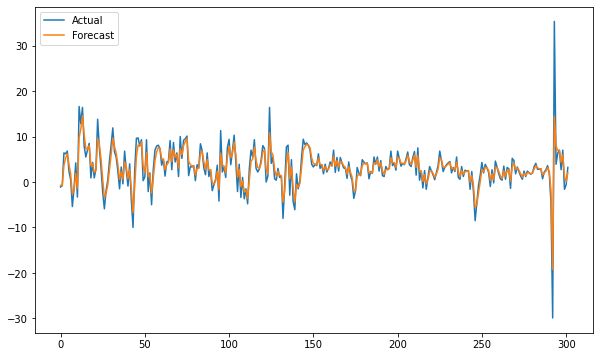

In [39]:
# Plot the actual and forecasted values
plt.figure(figsize=(10, 6)) 
plt.plot(df['Actual'], label='Actual')
plt.plot(df['Forecast'], label='Forecast')
plt.legend()
plt.show()